Coin flip

**P-Value use case in StartUp Revenue Prediction**:<br>Finding features that are unlikely to contribute significantly to the prediction`

In [14]:
 # Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
#Importing the dataset
dataset = pd.read_csv('sample_data/50_Startups.csv')
dataframe = pd.DataFrame(dataset, columns=dataset.columns)
dataframe.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


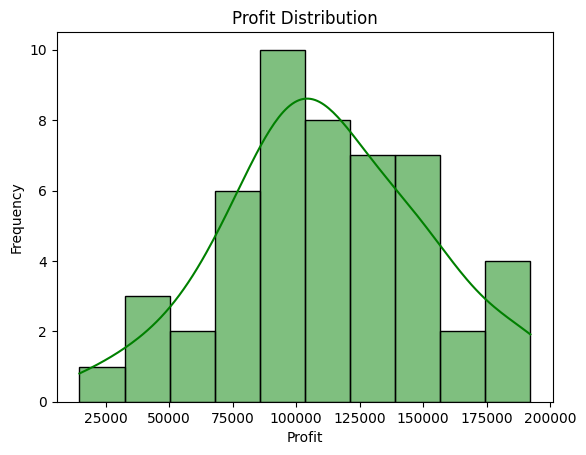

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the histogram
sns.histplot(dataset['Profit'], kde=True, color='green', bins=10)
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()


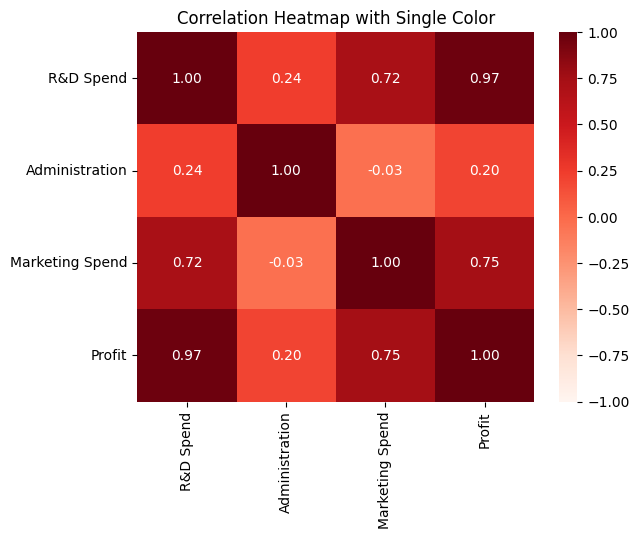

In [17]:
# Compute the correlation matrix
corr = dataset[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].corr()

# Heatmap with a single color
sns.heatmap(corr, annot=True, cmap='Reds', fmt=".2f", vmin=-1.00, vmax=1.00)
plt.title('Correlation Heatmap with Single Color')
plt.show()

### Pearson Correlation Coefficient

The **Pearson correlation coefficient** (denoted as \( r \)) measures the linear relationship between two variables. It is calculated using the following formula:

$$
r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}}
$$

Where:
- \( r \) is the Pearson correlation coefficient.
- \( X_i \) and \( Y_i \) are the individual data points from the two variables \( X \) and \( Y \).
- \( \bar{X} \) and \( \bar{Y} \) are the means (averages) of the variables \( X \) and \( Y \), respectively.
- The summation is done over all the data points.

### Interpretation of the Correlation Coefficient:
- \( r = 1 \): Perfect positive linear relationship.
- \( r = -1 \): Perfect negative linear relationship.
- \( r = 0 \): No linear relationship.
- \( 0 < r < 1 \): Positive linear relationship (stronger correlation as \( r \) approaches 1).
- \( -1 < r < 0 \): Negative linear relationship (stronger correlation as \( r \) approaches -1).


Note: Correlation is great for understanding how strongly two variables are related, but it does not indicate causality or statistical significance

In [68]:
#Separating independent and dependent varaiables
X = dataset.iloc[:, :-1].values #[R&D Spend, Administration, Marketing Spend, State]
y = dataset.iloc[:, -1].values #Profit

# Encoding categorical data (State column)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

In [111]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X = X[:, 1:] # Avoiding the Dummy Variable Trap

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]
Mean Absolute Error (MAE): 7514.29


In [112]:
r2_score = regressor.score(X_test, y_test)
print(f"R² Score: {r2_score:.2f}")

R² Score: 0.93


In [113]:
#Building the optimal model using Backward Elimination
import statsmodels.api as sm
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           1.34e-27
Time:                        04:36:19   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 3, 4, 5]]
X_opt = X_opt.astype(np.float64)

In [121]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 4, 5]]
X_opt = X_opt.astype(np.float64)

In [100]:
import ipywidgets as widgets
from IPython.display import display, HTML, Javascript

# Function to toggle the visibility of the code
def toggle_code(b):
    # Use JavaScript to toggle the visibility of code cells
    display(Javascript('''
        var cells = Jupyter.notebook.get_cells();
        for (var i=0; i < cells.length; i++) {
            if (cells[i].cell_type === "code") {
                cells[i].element.toggleClass("hidden");
            }
        }
    '''))

# Create the toggle button for hiding/showing code
toggle_button = widgets.Button(description="Toggle Code Visibility")

# Create the question widget
question = widgets.Label(value="🌟 What is 2 + 2? 🌟")

# Multiple choice options
options = ['a) 1', 'b) 2', 'c) 3', 'd) 4']
radio_buttons = widgets.RadioButtons(
    options=options,
    description='Choose:',
    disabled=False
)

# Answer widget, initially hidden
answer = widgets.Label(value="🎉 Correct answer: d) 4! 🎉")
answer.layout.visibility = 'hidden'

# Feedback widget
feedback = widgets.Label(value="")
feedback.layout.visibility = 'hidden'

# Create the button to reveal the answer
reveal_button = widgets.Button(description="Reveal Answer")

# Define what happens when the button is clicked
def on_button_click(b):
    answer.layout.visibility = 'visible'  # Show the correct answer when button is clicked
    selected_answer = radio_buttons.value
    if selected_answer == 'd) 4':
        feedback.value = "🎉 Correct! Well done! 🎉"
    else:
        feedback.value = "😅 Oops! Try again next time! 😅"
    feedback.layout.visibility = 'visible'  # Show feedback when button is clicked

# Link the button click to the function
reveal_button.on_click(on_button_click)

# Link the toggle button to toggle the code cell visibility
toggle_button.on_click(toggle_code)

# Display the widgets
display(toggle_button, question, radio_buttons, reveal_button, answer, feedback)


Button(description='Toggle Code Visibility', style=ButtonStyle())

Label(value='🌟 What is 2 + 2? 🌟')

RadioButtons(description='Choose:', options=('a) 1', 'b) 2', 'c) 3', 'd) 4'), value='a) 1')

Button(description='Reveal Answer', style=ButtonStyle())

Label(value='🎉 Correct answer: d) 4! 🎉', layout=Layout(visibility='hidden'))

Label(value='', layout=Layout(visibility='hidden'))

In [ ]:
**P-Value use case in StartUp Revenue Prediction**:<br>Finding features that are unlikely to contribute significantly to the prediction